# Introduction

Here is the complete summary with brief context before each table and the minimal I/O code inlined.

**Core building blocks.** Start with the primitives you’ll touch in every audio task.

| Concept             | Definition                                  | Why it matters                                  |
| ------------------- | ------------------------------------------- | ----------------------------------------------- |
| Audio format        | mp3, wav, m4a, flac                         | Encodings differ, but all store sampled signals |
| Sampling rate (f_s) | Samples per second (kHz)                    | Sets data volume and time resolution            |
| Frame/sample        | One discrete amplitude value                | Atomic unit of a digital waveform               |
| Bytes vs samples    | Raw bytes need decoding to numbers          | Convert before analysis or plotting             |
| Visibility          | Audio isn’t human-readable like tables/text | Enforces decode → inspect workflow              |

**Scale of data.** Compare common sampling rates to gauge volume per second and per 2-second clip.

| Typical (f_s) | Use case                        | Samples/sec | Samples in 2 s |
| ------------- | ------------------------------- | ----------: | -------------: |
| 8 kHz         | Telephony, speech               |       8,000 |         16,000 |
| 16 kHz        | Higher-quality speech           |      16,000 |         32,000 |
| 32 kHz        | Streaming music (example given) |      32,000 |         64,000 |
| 48 kHz        | Example `good_morning.wav`      |      48,000 |         96,000 |



**Pipeline.** Typical stages from raw bytes to features and models.

| Workflow step | Action                    | Note                                 |
| ------------- | ------------------------- | ------------------------------------ |
| Decode        | Open file and read frames | WAV stores bytes on disk             |
| Convert       | Bytes → numeric array     | Enables math and visualization       |
| Inspect       | Plot waveform or spectrum | Verify duration, channels, noise     |
| Feature       | MFCC, log-mels, energy    | Compress signal to informative stats |
| Model         | Classify, regress, ASR    | Choose per task and data size        |

**Quick estimator.** One line to estimate sample count from duration and rate.

| Formula            | Meaning                                    |
| ------------------ | ------------------------------------------ |
| $N = f_s \times T$ | Total samples in $T$ seconds at rate $f_s$ |


## Importing an audio file with Python

In [57]:
import wave

# Create audio file wave object
mayonnaise = wave.open("../../data/audio.wav", 'rb')
# wave.open() returns a Wave_read object, which provides methods to access the properties and data of the WAV file. the 'r' argument specifies that the file is opened in read mode. there are other modes like 'rb' for reading in binary mode. 

# Read all frames from wave object 
signal_mayo = mayonnaise.readframes(-1)
# The readframes() method reads and returns a specified number of audio frames from the WAV file. The argument -1 indicates that all remaining frames should be read.

# View first 10
print(signal_mayo[:10])
# The output is a byte string representing the raw audio frames.
# each pair of bytes corresponds to a single audio sample in 16-bit PCM format. In this case b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00' represents samples with a value of 0.
# A x00 byte indicates a sample value of 0 in little-endian format. An little-endian format means that the least significant byte (LSB) comes first, followed by the most significant byte (MSB).

print(signal_mayo[100000:100005])
# In this case b')\xff\xc8\xfe;' represents samples with values of 0x29, 0xc8, and 0xfe respectively.
# The b' means that this is a byte string. Each pair of bytes represents a single audio sample in 16-bit PCM format.

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
b')\xff\xc8\xfe;'


## Bytes to strings

In [58]:
import numpy as np
# Convert byte data to numpy array

samples = np.frombuffer(signal_mayo, dtype=np.int16)
print(samples[:10])
# The dtype=np.int16 specifies that each sample is a 16-bit signed integer, which is standard for PCM audio data.
print(samples[100000:100005])


[0 0 0 0 0 0 0 0 0 0]
[200 193 198 198 201]


In [59]:
samples[:10]
# They are an array of integers representing the amplitude of the audio signal at each sample point.
# int16 means that each sample is represented by a 16-bit signed integer. This is a common format for audio data, allowing for a range of values from -32768 to 32767, which captures the amplitude variations of the audio signal.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

### Number of hertz

In [60]:
# we can know the hertz of the audio file by using the getframerate() method
mayonnaise.getframerate()

44100

### Duration of the audio file in seconds

In [61]:
# to get the duration of the audio file we can use the getnframes() method and divide it by the framerate
n_frames = mayonnaise.getnframes()
duration = n_frames / mayonnaise.getframerate()
print(f"Duration: {duration} seconds")
print(f"Number of frames: {n_frames}")

Duration: 23.312834467120183 seconds
Number of frames: 1028096


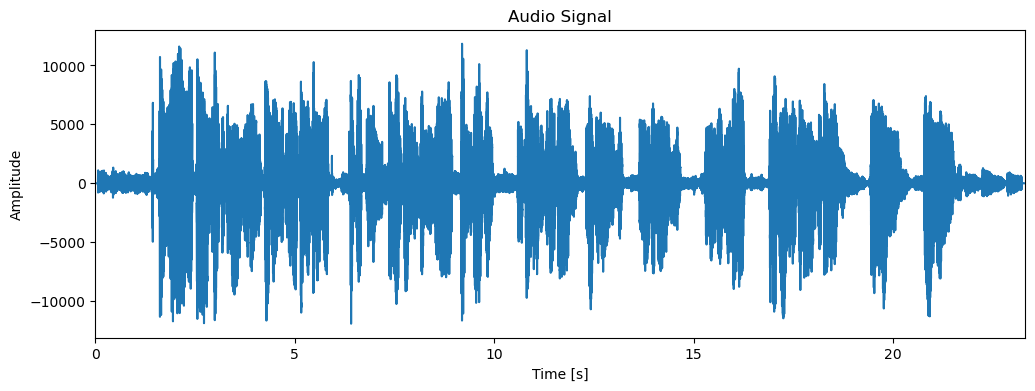

In [ ]:
# linspace to create an array of time values corresponding to each sample
time = np.linspace(0, duration, num=len(samples))
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(time, samples)
plt.title("Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude") # Amplitude refers to the height of the sound wave, which corresponds to the loudness of the sound. Higher amplitude values indicate louder sounds, while lower values indicate quieter sounds.
plt.xlim(0, duration)  # Limit x-axis to the duration of the audio
plt.show()

In [63]:
sade = wave.open("../../data/audio2.wav", 'rb')
signal_sade = sade.readframes(-1)
sade_samples = np.frombuffer(signal_sade, dtype=np.int16)

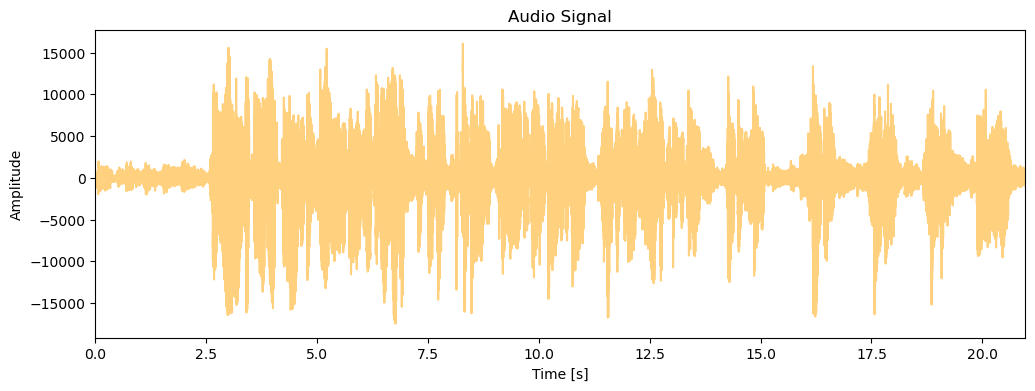

In [65]:
duration_sade = sade.getnframes() / sade.getframerate()
sade_time = np.linspace(0, duration_sade, num=len(sade_samples))
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(sade_time, sade_samples, color='orange', alpha=0.5)
plt.title("Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.xlim(0, duration_sade)  # Limit x-axis to the duration of the audio
plt.show()

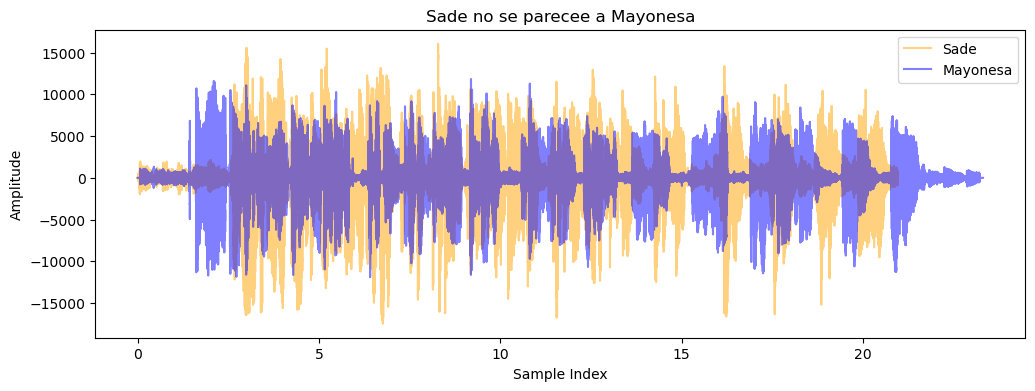

In [66]:
plt.figure(figsize=(12, 4))
plt.plot(sade_time, sade_samples, color='orange', alpha=0.5)
plt.plot(time, samples, color='blue', alpha=0.5)
plt.title("Sade no se parecee a Mayonesa")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend(["Sade", "Mayonesa"])
plt.show()